# <span style="color:red">======================Ayad======================</span>

# <span style="color:blue">1- Data</span>

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [2]:
X, y = mnist["data"], mnist["target"]

In [3]:
X.shape, y.shape

((70000, 784), (70000,))

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

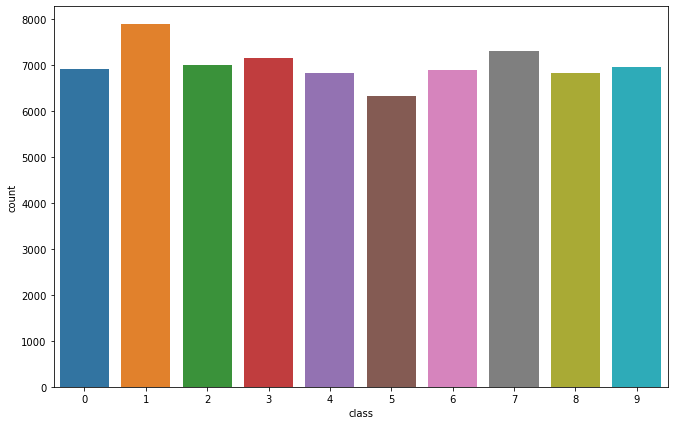

In [5]:
plt.figure(figsize=(11, 7))

sns.countplot(y)
plt.show()

 ### <span style="color:green">Is there any missing values???</span>

In [6]:
X.isnull().sum().values.sum()

0

# <span style="color:blue">2- Fitting the RFC model on the original dataset</span>

#### Because we will fit this more than once, might as well make a function

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [8]:
def fit_random_forest_classifier(X, y, cm = False):
    '''
    INPUT: names are pretty self explanatory
    OUTPUT: none - prints the confusion matrix and accuracy
    '''
    #First let's create training and testing data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

    #We could grid search and tune, but let's just fit a simple model to see how it does
    #instantiate
    clf = RandomForestClassifier(n_estimators=100, max_depth=None)

    #fit
    clf.fit(X_train, y_train)

    #predict
    y_preds = clf.predict(X_test)

    #score
    if cm:
        mat = confusion_matrix(y_test, y_preds)
        print(sns.heatmap(mat, annot=True, cmap='bwr', linewidths=.5))
    
    acc = accuracy_score(y_test, y_preds)
    return acc

In [32]:
import time

In [28]:
tic = time.time()

acc = fit_random_forest_classifier(X, y)
print(f"RF acheived an accuracy of {round(acc*100, 2)}% before dimensionality reduction.")

toc = time.time()
print(f'\nThe consumed time for fitting after dimensionality reduction: {np.round(toc-tic, 4)} Seconds')

RF acheived an accuracy of 96.56% before dimensionality reduction.

The consumed time for fitting after dimensionality reduction: 38.0942 Seconds


# <span style="color:blue">3- Random Projection</span>

In [10]:
from sklearn.random_projection import SparseRandomProjection
rp = SparseRandomProjection(eps = 0.5)

In [12]:
X_rp = rp.fit_transform(X)

In [13]:
rp_dim = rp.n_components_
X_dim = X.shape[1]
print("The orignial data has {} dimensions and it is reduced to {} after random projection.".format(X_dim, rp_dim))

The orignial data has 784 dimensions and it is reduced to 535 after random projection.


In [29]:
tic = time.time()

acc = fit_random_forest_classifier(X_rp, y)
print(f"RF acheived an accuracy of {round(acc*100, 2)}% after dimensionality reduction.")

toc = time.time()
print(f'\nThe consumed time for fitting after dimensionality reduction: {np.round(toc-tic, 4)} Seconds')

RF acheived an accuracy of 94.52% after dimensionality reduction.

The consumed time for fitting after dimensionality reduction: 106.6518 Seconds


`*` Epsilon is the level of errors that determins how much the transformed data is distorded from the original data. Now, see if you can change the epsilon to reduce the dimension even more. What is the accuracy of the classifying model?

In [33]:
# TODO: write a loop to transform X using different epsilons and get the accuracy score of classification
for sample_eps in np.arange(0.5, 0.9, 0.1):
    rp = SparseRandomProjection(eps = sample_eps)
    X_rp = rp.fit_transform(X)
    acc = fit_random_forest_classifier(X, y)
    print(f"With epsilon = {sample_eps}, the transformed data has {X_rp.shape[1]} components, a random forest acheived an accuracy of {round(acc*100, 2)}%.")

With epsilon = 0.5, the transformed data has 535 components, a random forest acheived an accuracy of 96.5%.
With epsilon = 0.6, the transformed data has 413 components, a random forest acheived an accuracy of 96.59%.
With epsilon = 0.7, the transformed data has 341 components, a random forest acheived an accuracy of 96.52%.
With epsilon = 0.7999999999999999, the transformed data has 298 components, a random forest acheived an accuracy of 96.55%.


`*` As you can see, the accuracy is still very high after recuding more than half of the columns. And higer value of epsilon gives you a dataset with lower number of components. epsilon is an important parameter in the the Johnson-Lindenstrauss lemma. Let's see how epsilon changes the number of components projected.

In [34]:
from sklearn.random_projection import johnson_lindenstrauss_min_dim
eps = np.arange(0.1, 1, 0.01)
n_comp = johnson_lindenstrauss_min_dim(n_samples=1e6, eps=eps)

In [35]:
import matplotlib.pyplot as plt

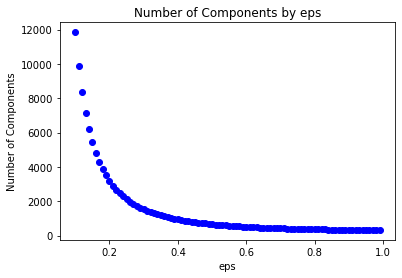

In [36]:
plt.plot(eps, n_comp, 'bo');
plt.xlabel('eps');
plt.ylabel('Number of Components');
plt.title('Number of Components by eps');

# <span style="color:red">======================Ayad======================</span>